In [73]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from matplotlib import pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

import seaborn as sns

import pickle

In [74]:
# importing nba data

nba_data = pd.read_csv('CSV_files/cleaned_nba_data.csv', index_col = 0)

In [75]:
# checking all the columns to make sure they are still good

nba_data.columns

Index(['3P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PF', 'PTS', 'TEAM', 'AGE',
       'W', 'SOS', 'PACE', '3PAr', 'TS%', 'TOV%', 'ORB%', 'FT/FGA', 'D_eFG%',
       'D_TOV%', 'DRB%', 'D_FT/FGA', 'SEASON'],
      dtype='object')

### Creating Target and Features

In [96]:
# creating an x for features and y for target

X = nba_data.drop(columns = ['W', 'TEAM', 'SEASON'])
y = nba_data['W']

### Train Test Split

In [97]:
# train test split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23,test_size=0.2)  

In [98]:

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = pd.DataFrame(data=scaler.transform(X_train), columns = X.columns)
X_test_scale = pd.DataFrame(data=scaler.transform(X_test), columns = X.columns)

### Lasso Test 

#### Turned out to be the best type of model after comparing results in multiple scenarios

In [99]:
# import lasso regression model as it was the best performing one in all my practice

from sklearn.linear_model import Lasso

In [100]:
# create a new lasso model with some hyper parameters that were tested
lasso = Lasso(alpha = .02, max_iter = 4000)

# fitting to the training data
lasso.fit(X_train_scale, y_train)

# predicting on the testing data
lasso_pred = lasso.predict(X_test_scale)

# finding the root mean squared error
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, lasso_pred))

#printing out the result
print('Testing Error: '+ str(test_rmse))

Testing Error: 4.325724421001547


We can see that the model does fairly well since the most wins is 73 and the least is 11, the average is 41 so only being 5 off is pretty good

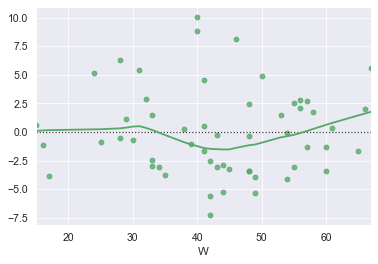

In [101]:
# plotting the residuals vs the actual predictions to see the results

sns.residplot(y_test, lasso_pred, lowess=True, color="g")

In [102]:
# importing sklearn for vif scores and cross validation

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Final Check of Collinearity of the Data

In [103]:
# checking the colinearity of the different features to make sure nothing is incredibly high

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,930.121273,3P%
1,861.932952,FT%
2,11788.143345,TRB
3,334.337667,AST
4,525.808134,STL
5,68.192416,BLK
6,1193.616506,PF
7,14400.467363,PTS
8,432.565648,AGE
9,1.363007,SOS


Checking *R^2* Value

In [104]:
X_endog = sm.add_constant(X_test)

/Users/antoniohila/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [105]:
res = sm.OLS(y_test, X_endog).fit()

In [106]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     26.23
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           3.95e-15
Time:                        20:23:00   Log-Likelihood:                -140.55
No. Observations:                  55   AIC:                             323.1
Df Residuals:                      34   BIC:                             365.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -394.3427    155.256     -2.540      0.016    -709.862     -78.824
3P%           84.4718     50.307      1.679      0.102     -17.765     186.709
FT%           28.8448     22.485      1.283      0.208     -16.851      74.540
TRB            0.9785      1.679      0.583      0.564      -2.433       4.390
AST           -0.3352      0.453     -0.739      0.465      -1.257       0.586
STL            8.8574      2.633      3.364      0.002       3.507      14.208
BLK           -1.8042      1.163     -1.551      0.130      -4.168       0.559
PF             2.0018      1.084      1.847      0.073      -0.200       4.204
PTS           -3.2890      1.630     -2.018      0.052      -6.601       0.023
AGE            1.4516      0.445      3.262      0.003       0.547       2.356
SOS           -3.1709      1.919     -1.653      0.108      -7.070       0.728
PACE           2.2197      1.683      1.319      0.196      -1.200       5.639
3PAr         -26.6244     19.213     -1.386      0.175     -65.670      12.421
TS%          876.2321    280.323      3.126      0.004     306.546    1445.918
TOV%          -7.5238      2.341     -3.214      0.003     -12.281      -2.766
ORB%           2.3115      0.955      2.421      0.021       0.371       4.252
FT/FGA       -15.5042     44.329     -0.350      0.729    -105.592      74.583
D_eFG%      -237.6225     95.565     -2.486      0.018    -431.834     -43.411
D_TOV%        -3.4429      2.062     -1.669      0.104      -7.634       0.749
DRB%           1.3164      0.699      1.882      0.068      -0.105       2.738
D_FT/FGA    -103.9051     79.120     -1.313      0.198    -264.697      56.887
==============================================================================
Omnibus:                        0.659   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.176
Skew:                           0.079   Prob(JB):                        0.916
Kurtosis:                       3.228   Cond. No.                     1.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(lasso, X, y, scoring='r2', cv=crossvalidation))

baseline

0.7940637334128982

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

The final model included 9 features the 4 most valuable, according to the Lasso model were, DFG%, TS_Pts and TOVs. 

DFG% was the most effective tool, this is the shooting % of the other team, and it had a large affect on the data which makes sense, and goes with my original idea that defense should a big proponent in wins

TS also made sense. As they show the efficiency of scoring with TS. The volume of scoring itself did not have as much of an impact in the end as the rest

TOV is a measure of possessions. This is negatively correlated as expected as less turnovers means you have the ball more. This goes with DFG% as if you have a higher rate of turnovers and more possessions it will lead to the most efficiency. 

*Honorable mention to Age which had a high correlation and i believe this is due to the trend of tanking in the nba which has become much more prevelant in the last decade where more teams will completely rebuild their rosters from the ground up and go all in on youth to lose more on purpose.* 
 

Overall the model was very effective. From the final results of an R^2 of .902 i was able to find the proper balance between overfitting and underfitting the model using the most valuable stats. 

What i learned is that efficiency was key when creating features in the data. So in terms of basketball for offense its more about finding quality shots rather than more shots. and for defense hindering the opponents quality looks is better than something like blocks, steals or rebounds.

Possesion also matters, maintaining low turnovers had a very positive affect on teams wins in the model.

Things that didnt matter as much were rebounding as a whole, surprisingly 3 pt shooting didnt mean much either, at least the quantity. This may be due to the data we have being during the 3 point shooting era as even though the numbers have increased year upon year the overall numbers are still pretty close compared to where they were even 10 years ago. 